## 1. Гамильтониан Джейнса-Каммингса и приближение RWA

<b>Задача:</b>
<em>Построить матрицу точного гамильтониана Джейнса-Каммингса при $\frac{g}/{\hbar\omega}$ = $10^{-1}$, $10^{-2}$, $10^{-3}$ и решить для каждого из этих случаев задачу Коши для уравнения Шредингера с начальным условием: атом в возбужденном состоянии, в полости нет фотонов. Инструкция: матрицу урезать до величины, с которой может работать ваш компьютер.</em>

### Приближение RWA. Матричные элементы гамильтониана

$H_{JC}^{RWA} = \hbar \omega a^\dagger a + \hbar \omega \sigma^\dagger \sigma + g(a^\dagger \sigma + a \sigma^\dagger)$

Заводим ортонормированный базис $|n,m>$, n = 0,1,2,..., m = 0,1

Выпишем матричные элементы гамильтониана - сначала просто для операторов рождения-уничтожения:

$<n,m|a^\dagger a| n'm'> = n\ \delta_{nn'} \delta_{mm'}$ $\rightarrow$ диагональ

$<n,m|\sigma^\dagger \sigma| n'm'> = \delta_{m,1}\ \delta_{nn'} \delta_{mm'}$ $\rightarrow$ диагональ

$<n,m|a^\dagger \sigma| n'm'> = \sqrt{n}\ \delta_{n,n'+1} \delta_{m,0} \delta_{m',1}$ $\rightarrow$ недиагональные

$<n,m|a \sigma^\dagger| n'm'> = \sqrt{n+1}\ \delta_{n,n'-1} \delta_{m,1} \delta_{m',0}$ $\rightarrow$ недиагональные

Теперь нетрудно выписать матричные элементы полного гамильтониана Джейнса-Каммингса в приближении RWA:

$<n,m|H|n',m'> = \hbar \omega n\ \delta_{nn'} \delta_{mm'} + \hbar \omega \delta_{m,1}\ \delta_{nn'} \delta_{mm'} + g \sqrt{n}\ \delta_{n,n'+1} \delta_{m,0} \delta_{m',1} + g \sqrt{n+1}\ \delta_{n,n'-1} \delta_{m,1} \delta_{m',0}$

Построим и диагонализуем такую матрицу для заданной размерности (фотонного) базиса. Поскольку важным для обсуждения вопроса о применимости приближения RWA является только отношение $g/{\hbar\omega}$, удобно переопределить единицы измерения следующим образом:

$g \rightarrow \frac{g}{\hbar\omega}$

То есть теперь мы оперируем одной лишь константой связи $g$.

In [1]:
from math import *
import numpy as np
import numpy.linalg as linalg

In [2]:
def kron_delta(i,j):
    if i == j:
        return 1
    else:
        return 0

def matrix_element_jc_rwa(n1, m1, n2, m2, g):
    self_photon = n1 * kron_delta(n1,n2) * kron_delta(m1,m2)
    self_atom = kron_delta(m1,1) * kron_delta(n1,n2) * kron_delta(m1,m2)
    int_deexc = g * sqrt(n1) * kron_delta(n1,n2+1) * kron_delta(m1,0) * kron_delta(m2,1)
    int_exc = g * sqrt(n1+1) * kron_delta(n1,n2-1) * kron_delta(m1,1) * kron_delta(m2,0)
    return self_photon + self_atom + int_deexc + int_exc

def hamiltonian_jc_rwa(nmax, g):
    H = np.zeros((2*(nmax+1),2*(nmax+1)))
    for n1 in range(0,nmax+1):
        for m1 in range(0,2):
            for n2 in range(0,nmax+1):
                for m2 in range(0,2):
                    h = matrix_element_jc_rwa(n1, m1, n2, m2, g)
                    H[n1*2+m1,n2*2+m2] = h
    return H

nmax = 2
g = 0.1

H_JC_RWA = hamiltonian_jc_rwa(nmax, g)
print(H_JC_RWA)

[[0.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.1        0.         0.         0.        ]
 [0.         0.1        1.         0.         0.         0.        ]
 [0.         0.         0.         2.         0.14142136 0.        ]
 [0.         0.         0.         0.14142136 2.         0.        ]
 [0.         0.         0.         0.         0.         3.        ]]


Выполним диагонализацию средствами NumPy и посмотрим на собственные значения:

In [3]:
def eigensolver(H):
    e, v = linalg.eig(H)
    idx = e.argsort()[::1]   
    e = e[idx]
    v = v[:,idx]
    return e, v

E, v = eigensolver(H_JC_RWA)
print(E)
print(v)

[0.         0.9        1.1        1.85857864 2.14142136 3.        ]
[[ 1.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.70710678  0.70710678  0.          0.          0.        ]
 [ 0.          0.70710678  0.70710678  0.          0.          0.        ]
 [ 0.          0.          0.         -0.70710678  0.70710678  0.        ]
 [ 0.          0.          0.          0.70710678  0.70710678  0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]]


Стационарное уравнение Шредингера решено, и можно теперь выписать решение зависящего от времени уравнения Шредингера. Вспоминаем общую формулу для решения:

$|\Psi(t)> = \sum_{j=0}^{N-1} \lambda_j e^{-\frac{i}{\hbar}E_j t} |\phi_j>$

Теперь вспомним, что в основном состоянии у нас нет фотонов, и энергия у него нулевая. Основное состояние отцеплено от остальных пар состояний, и очевидно, что в основном состоянии ничего не происходит, волновая функция $|0,0>$ от времени не зависит, осцилляций не будет. А вот для первой пары возбужденных состояний должны быть осцилляции. Реализуем функцию для расчета $\Psi(t)$ на сетке значений $t$. Будем помнить, что собственные векторы хранятся в столбцах матрицы.

И еще преставляется удобным избавиться от экспоненты, переписав ее по формуле Эйлера.

$e^{ix} = \cos x + i \sin x$

Чтобы вычислить заселенности базисных состояний $\chi_{nm} = |n,m>$ в момент времени $t$, перепишем $|\Psi(t)>$ через эти базисные функции:

$\phi_j = \sum_{nm} C_{nm,j} \chi_{nm} $

$|\Psi(t)> = \sum_{nm} ( \sum_{j=0}^{N-1} \lambda_j C_{nm,j} e^{-\frac{i}{\hbar}E_j t} ) \chi_{nm} $

$n_{nm}(t) = |\sum_{j=0}^{N-1} \lambda_j C_{nm,j} e^{-\frac{i}{\hbar}E_j t}|^2 = |\sum_{j=0}^{N-1} \lambda_j C_{nm,j} \cos {\frac{E_j}{\hbar} t} -i \sum_{j=0}^{N-1} \lambda_j C_{nm,j} \sin {\frac{E_j}{\hbar} t} |^2 $

Будем смотреть на первую пару возбужденных состояний.
Наконец, выберем начальное условие: есть свободный фотон, а атом находится в основном состоянии. То есть

$|\Psi(0)> = |1,0>$

Найдем соответствующие коэффициенты $\lambda_j$ (смотрим на матрицу коэфф-в выше):

$|\phi_1> \sim - |1,0> + |0,1>$

$|\phi_2> \sim + |1,0> + |0,1>$

$|1,0> = \frac{\phi_2 - \phi_1}{\sqrt{2}}$

Следовательно, $\lambda_1 = -\frac{1}{\sqrt{2}}$, $\lambda_2 = +\frac{1}{\sqrt{2}}$.

Все остальные $\lambda$ будут равными нулю. Кроме того, полагаем, что $\hbar = 1$, т.е. решаем задачу в атомных единицах.

In [4]:
def psi_t(t, nmax, lam, E, C):
    basis_dim = 2*(nmax+1)
    psi = np.zeros((basis_dim), dtype=np.cdouble)
    
    for alpha in range(0,basis_dim):
        coef_nm_re = 0.0
        coef_nm_im = 0.0
        for j in range(0,basis_dim):
            coef_nm_re += lam[j] * C[alpha,j] * cos(E[j]*t)
            coef_nm_im += - lam[j] * C[alpha,j] * sin(E[j]*t)
        psi[alpha] = coef_nm_re + coef_nm_im * 1j

    return psi

lam = np.zeros(2*(nmax+1))
lam[1] = - 1.0 / sqrt(2.0)
lam[2] = + 1.0 / sqrt(2.0)

# волновая функция в начальный момент времени - для проверки
print(psi_t(0, nmax, lam, E, v))


[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [5]:
t = np.linspace(0, 100, 100)
psi = np.zeros((len(t), 2*(nmax+1)), dtype=np.cdouble)
for i,ti in enumerate(t):
    psi[i,:] = psi_t(ti, nmax, lam, E, v)

n_10 = abs(psi[:,1])**2
n_01 = abs(psi[:,2])**2

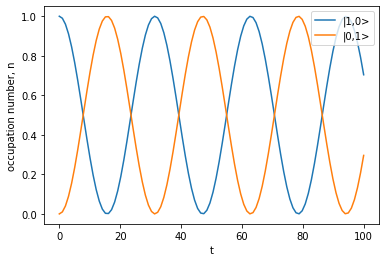

In [6]:
import matplotlib.pyplot as plt

plt.plot(t, n_10, label='|1,0>')
plt.plot(t, n_01, label='|0,1>')
plt.legend(loc='upper right')
plt.xlabel('t')
plt.ylabel('occupation number, n')
plt.show()



### Точный гамильтониан JC

К гамильтониану JC-RWA добавляются недиагональные слагаемые, связывающие разные пары состояний $|n,0>$ и $|n-1,1>$:

$H_{JC} = H_{JC}^{RWA} + g(a\sigma + a^\dagger \sigma^\dagger)$

Нетрудно выписать добавку к общей формуле для матричных элементов:

$<n,m|H|n',m'> = <n,m|H_{JC}^{RWA}|n',m'> + g\sqrt{n+1} \delta_{n,n'-1} \delta_{m,0} \delta_{m',1} + g\sqrt{n} \delta_{n,n'+1} \delta_{m,1} \delta_{m',0}$

In [7]:
def matrix_element_jc(n1, m1, n2, m2, g):
    h_jc_rwa = matrix_element_jc_rwa(n1, m1, n2, m2, g)
    v1 = g * sqrt(n1+1) * kron_delta(n1,n2-1) * kron_delta(m1,0) * kron_delta(m2,1)
    v2 = g * sqrt(n1)   * kron_delta(n1,n2+1) * kron_delta(m1,1) * kron_delta(m2,0)
    return h_jc_rwa + v1 + v2

def hamiltonian_jc(nmax, g):
    H = np.zeros((2*(nmax+1),2*(nmax+1)))
    for n1 in range(0,nmax+1):
        for m1 in range(0,2):
            for n2 in range(0,nmax+1):
                for m2 in range(0,2):
                    h = matrix_element_jc(n1, m1, n2, m2, g)
                    H[n1*2+m1,n2*2+m2] = h
    return H

nmax = 2
g = 0.1

H_JC = hamiltonian_jc(nmax, g)
print(H_JC)
E, v = eigensolver(H_JC)
print('Energy levels:')
for i in range(0,min(10,len(E))):
    print('%20.16f' % E[i])

[[0.         0.         0.         0.1        0.         0.        ]
 [0.         1.         0.1        0.         0.         0.        ]
 [0.         0.1        1.         0.         0.         0.14142136]
 [0.1        0.         0.         2.         0.14142136 0.        ]
 [0.         0.         0.         0.14142136 2.         0.        ]
 [0.         0.         0.14142136 0.         0.         3.        ]]
Energy levels:
 -0.0050124372683642
  0.8951363068229641
  1.0948886302202330
  1.8612395131875532
  2.1437729240808121
  3.0099750629568018


Поизучаем теперь сходимость энергий относительно размерности пространства фотонов.
Посмотрим на 3 низших по энергии решений (основное + первая пара возбужденных).

In [8]:
max_nroots = 3
ph_space_dims = [2,3,4,5,6,10,100]

for i,dim in enumerate(ph_space_dims):
    nmax = dim - 1
    H_JC = hamiltonian_jc(nmax, g)
    E, v = eigensolver(H_JC)
    print('nmax=%3d  %20.16f%20.16f%20.16f' % (nmax,E[0],E[1],E[2]))

nmax=  1   -0.0049875621120892  0.9000000000000000  1.1000000000000001
nmax=  2   -0.0050124372683642  0.8951363068229641  1.0948886302202330
nmax=  3   -0.0050125310136719  0.8951024570580637  1.0948472948893355
nmax=  4   -0.0050125312489187  0.8951022985294366  1.0948470696467978
nmax=  5   -0.0050125312494100  0.8951022980554135  1.0948470689018284
nmax=  9   -0.0050125312494107  0.8951022980542691  1.0948470688998746
nmax= 99   -0.0050125312494107  0.8951022980542755  1.0948470688998970


Получившийся результат означает крайне быструю сходимость по отношению к размерности фотонного подпространства.

### Сравнение гамильтонианов JC и JC-RWA при разных значениях параметра $g$

Теперь посмотрим на динамику. Хорошо бы уметь легко задавать коэффициенты $\lambda_j$, вычислять их, исходя из желаемого нами разложения функции $|\Psi(t)>$ в момент времени $t=0$. Предполагая, что $\Psi(0)$ раскладывается по базису функций $|n,m>$ с коэффициентами $b_\alpha$, можем найти $\lambda_j$, решая систему линейных уравнений:

$\mathbf{C} \vec{\lambda} = \vec{b}$

Затем легко вычисляем динамику заселенностей для любого из уровней системы, как ранее для приближения RWA.

In [26]:
nmax = 50
g = 0.4

print('begin matrix construction')
H_JC = hamiltonian_jc(nmax, g)
H_JC_RWA = hamiltonian_jc_rwa(nmax, g)
print('begin diagonalization')
E_JC, v_JC = eigensolver(H_JC)
E_JC_RWA, v_JC_RWA = eigensolver(H_JC_RWA)
N = len(E_JC)

# setup the initial state, Psi(t=0)
psi_0 = np.zeros((N))
psi_0[1] = 1  # |0,1>
lam_JC = linalg.solve(v_JC, psi_0)
lam_JC_RWA = linalg.solve(v_JC_RWA, psi_0)
# print initial composition of Psi(t=0)
print('Psi(0) JC = ', psi_t(0, nmax, lam_JC, E_JC, v_JC)[:5])
print('Psi(0) JC RWA = ', psi_t(0, nmax, lam_JC_RWA, E_JC_RWA, v_JC_RWA)[:5])

# dynamics
t = np.linspace(0, 20, 200)
psi_jc = np.zeros((len(t), N), dtype=np.cdouble)
psi_jc_rwa = np.zeros((len(t), N), dtype=np.cdouble)
for i,ti in enumerate(t):
    psi_jc[i,:] = psi_t(ti, nmax, lam_JC, E_JC, v_JC)
    psi_jc_rwa[i,:] = psi_t(ti, nmax, lam_JC_RWA, E_JC_RWA, v_JC_RWA)

begin matrix construction
begin diagonalization
Psi(0) JC =  [-1.29653712e-37+0.j  1.00000000e+00+0.j  4.79550062e-17+0.j
  1.25937103e-35+0.j  9.97113678e-36+0.j]
Psi(0) JC RWA =  [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]


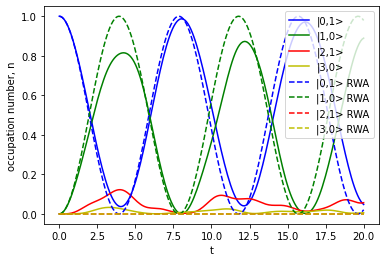

In [28]:
n_00 = abs(psi_jc[:,0])**2
n_01 = abs(psi_jc[:,1])**2
n_10 = abs(psi_jc[:,2])**2
n_11 = abs(psi_jc[:,3])**2
n_20 = abs(psi_jc[:,4])**2
n_21 = abs(psi_jc[:,5])**2
n_30 = abs(psi_jc[:,6])**2
n_31 = abs(psi_jc[:,7])**2

n_00_rwa = abs(psi_jc_rwa[:,0])**2
n_01_rwa = abs(psi_jc_rwa[:,1])**2
n_10_rwa = abs(psi_jc_rwa[:,2])**2
n_11_rwa = abs(psi_jc_rwa[:,3])**2
n_20_rwa = abs(psi_jc_rwa[:,4])**2
n_21_rwa = abs(psi_jc_rwa[:,5])**2
n_30_rwa = abs(psi_jc_rwa[:,6])**2
n_31_rwa = abs(psi_jc_rwa[:,7])**2

plt.plot(t, n_01, 'b', label='|0,1>')
plt.plot(t, n_10, 'g', label='|1,0>')
plt.plot(t, n_21, 'r', label='|2,1>')
plt.plot(t, n_30, 'y', label='|3,0>')
plt.plot(t, n_01_rwa, 'b--', label='|0,1> RWA')
plt.plot(t, n_10_rwa, 'g--', label='|1,0> RWA')
plt.plot(t, n_21_rwa, 'r--', label='|2,1> RWA')
plt.plot(t, n_30_rwa, 'y--', label='|3,0> RWA')
plt.legend(loc='upper right')
plt.xlabel('t')
plt.ylabel('occupation number, n')
plt.show()

Варьируя параметр $g$, найдем, что для $g \le 0.01$ приближение RWA работает очень хорошо.